<a href="https://colab.research.google.com/github/henrygas/unsupervised_learning/blob/master/pca_homework_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 挂载google云盘

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 2. 切换工作目录

In [0]:
import os
os.chdir("./drive/My Drive/app/pca_homework")

## 3. 检测当前工作目录

In [3]:
!ls

data  model


## 4. 从Otto商品数据集中抽取10000条记录

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

data_path = "./data/Otto_train.csv"
data = pd.read_csv(data_path)
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


In [48]:
data_use, data_del = train_test_split(data, train_size=10000, random_state=0)
data_use.shape

(10000, 95)

In [49]:
data_use = data_use.reset_index(drop=True)
data_use.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,7898,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Class_2
1,11288,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Class_2
2,10356,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,Class_2
3,13439,1,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,Class_2
4,54130,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,15,0,5,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Class_8


## 5. 将数据切分为id, X_train, target三部分

In [0]:
id = data_use["id"]
target = data_use["target"]
X_train = data_use.drop(["id", "target"], axis=1)

## 6. 对特征列X_train进行PCA降维,并观察方差在各个成分上的分布

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

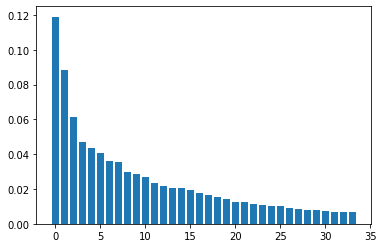

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

**可以看到前3个主成分的方差，占据了绝大部分的方差。**

## 7. 对原始特征进行tf-idf变换

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tfidf_csr_matrix = tfidf.fit_transform(X_train)

tfidf_feature_names = X_train.columns + "_tfidf"
X_train_tfidf = pd.DataFrame(data=X_train_tfidf_csr_matrix.toarray(), columns=tfidf_feature_names)
X_train_tfidf.head()

,feat_1_tfidf,feat_2_tfidf,feat_3_tfidf,feat_4_tfidf,feat_5_tfidf,feat_6_tfidf,feat_7_tfidf,feat_8_tfidf,feat_9_tfidf,feat_10_tfidf,feat_11_tfidf,feat_12_tfidf,feat_13_tfidf,feat_14_tfidf,feat_15_tfidf,feat_16_tfidf,feat_17_tfidf,feat_18_tfidf,feat_19_tfidf,feat_20_tfidf,feat_21_tfidf,feat_22_tfidf,feat_23_tfidf,feat_24_tfidf,feat_25_tfidf,feat_26_tfidf,feat_27_tfidf,feat_28_tfidf,feat_29_tfidf,feat_30_tfidf,feat_31_tfidf,feat_32_tfidf,feat_33_tfidf,feat_34_tfidf,feat_35_tfidf,feat_36_tfidf,feat_37_tfidf,feat_38_tfidf,feat_39_tfidf,feat_40_tfidf,...,feat_54_tfidf,feat_55_tfidf,feat_56_tfidf,feat_57_tfidf,feat_58_tfidf,feat_59_tfidf,feat_60_tfidf,feat_61_tfidf,feat_62_tfidf,feat_63_tfidf,feat_64_tfidf,feat_65_tfidf,feat_66_tfidf,feat_67_tfidf,feat_68_tfidf,feat_69_tfidf,feat_70_tfidf,feat_71_tfidf,feat_72_tfidf,feat_73_tfidf,feat_74_tfidf,feat_75_tfidf,feat_76_tfidf,feat_77_tfidf,feat_78_tfidf,feat_79_tfidf,feat_80_tfidf,feat_81_tfidf,feat_82_tfidf,feat_83_tfidf,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.682684,0.278016,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.180011,0.198141,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.439853,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.256477,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.235994,0.0,0.264654,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.569271,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.110149,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.104231,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.154495,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.065596,0.0,0.073562,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.197374,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.193312,0.0,0.0,0.0,0.0,0.000000,0.000000,0.270962,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.158432,0.0,0.000000,0.0,0.0,0.633419,0.0,0.0,0.0,0.0,0.384295,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.322727,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.128273,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.668426,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.066094,0.218253,0.0,0.000000,0.0,0.0,0.0,0.0,0.098477,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.161500,...,0.0,0.0,0.0,0.0,0.140497,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.204081,0.0,0.0,0.0,0.0,0.103180,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.086649,0.0,0.194345,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.097954,0.0,0.0,0.0,0.0,0.057593,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.077535,0.000000,0.000000,0.0,0.061993,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.118274,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.129850,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.062872,0.0,0.0,0.0,0.0,0.000000,0.88743,0.0,0.273109,0.265582,0.0,0.0,0.066991,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.064113,0.0,0.0,0.0


In [55]:
tfidf_data = pd.concat([id, X_train_tfidf, target], axis=1)
tfidf_data_path = "./data/Otto_FE_train_tfidf.csv"
tfidf_data.to_csv(tfidf_data_path, index=False, header=True)
tfidf_data.head()

,id,feat_1_tfidf,feat_2_tfidf,feat_3_tfidf,feat_4_tfidf,feat_5_tfidf,feat_6_tfidf,feat_7_tfidf,feat_8_tfidf,feat_9_tfidf,feat_10_tfidf,feat_11_tfidf,feat_12_tfidf,feat_13_tfidf,feat_14_tfidf,feat_15_tfidf,feat_16_tfidf,feat_17_tfidf,feat_18_tfidf,feat_19_tfidf,feat_20_tfidf,feat_21_tfidf,feat_22_tfidf,feat_23_tfidf,feat_24_tfidf,feat_25_tfidf,feat_26_tfidf,feat_27_tfidf,feat_28_tfidf,feat_29_tfidf,feat_30_tfidf,feat_31_tfidf,feat_32_tfidf,feat_33_tfidf,feat_34_tfidf,feat_35_tfidf,feat_36_tfidf,feat_37_tfidf,feat_38_tfidf,feat_39_tfidf,...,feat_55_tfidf,feat_56_tfidf,feat_57_tfidf,feat_58_tfidf,feat_59_tfidf,feat_60_tfidf,feat_61_tfidf,feat_62_tfidf,feat_63_tfidf,feat_64_tfidf,feat_65_tfidf,feat_66_tfidf,feat_67_tfidf,feat_68_tfidf,feat_69_tfidf,feat_70_tfidf,feat_71_tfidf,feat_72_tfidf,feat_73_tfidf,feat_74_tfidf,feat_75_tfidf,feat_76_tfidf,feat_77_tfidf,feat_78_tfidf,feat_79_tfidf,feat_80_tfidf,feat_81_tfidf,feat_82_tfidf,feat_83_tfidf,feat_84_tfidf,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf,target
0,7898,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.682684,0.278016,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.180011,0.198141,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.256477,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.235994,0.0,0.264654,0.0,0.000000,0.0,0.0,0.0,Class_2
1,11288,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.569271,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.110149,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.104231,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.154495,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.065596,0.0,0.073562,0.0,0.000000,0.0,0.0,0.0,Class_2
2,10356,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.197374,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.193312,0.0,0.0,0.0,0.0,0.000000,0.000000,0.270962,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.158432,0.0,0.000000,0.0,0.0,0.633419,0.0,0.0,0.0,0.0,0.384295,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.322727,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,Class_2
3,13439,0.128273,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.668426,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.066094,0.218253,0.0,0.000000,0.0,0.0,0.0,0.0,0.098477,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.140497,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.204081,0.0,0.0,0.0,0.0,0.103180,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.086649,0.0,0.194345,0.0,0.000000,0.0,0.0,0.0,Class_2
4,54130,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.097954,0.0,0.0,0.0,0.0,0.057593,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.077535,0.000000,0.000000,0.0,0.061993,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.118274,0.0,0.000000,...,0.0,0.0,0.0,0.129850,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.062872,0.0,0.0,0.0,0.0,0.000000,0.88743,0.0,0.273109,0.265582,0.0,0.0,0.066991,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.064113,0.0,0.0,0.0,Class_8


## 8. 对tfidf特征进行PCA降维，并观察方差在各个成分上的分布

In [0]:
from sklearn.decomposition import PCA
pca_tfidf = PCA(n_components=0.85)
pca_tfidf.fit(X_train_tfidf)
X_train_tfidf_pca = pca_tfidf.transform(X_train_tfidf)

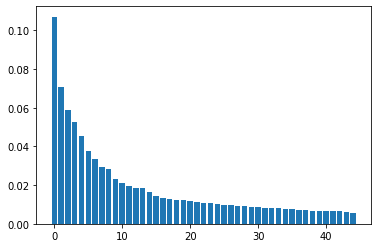

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(len(pca_tfidf.explained_variance_ratio_)), pca_tfidf.explained_variance_ratio_)
plt.show()

**可以看到经过tfidf后的特征，再进行PCA降维，方差分布进一步向头部的主成分集中**

In [67]:
n_components = pca_tfidf.n_components_
tfidf_pca_feature_names = list()
for i in range(n_components):
  tfidf_pca_feature_names.append("pca_{}".format(i))

X_train_tfidf_pca_df = pd.DataFrame(data=X_train_tfidf_pca, columns=tfidf_pca_feature_names)

tfidf_pca_data = pd.concat([id, X_train_tfidf_pca_df, target], axis=1)
tfidf_pca_data_path = "./data/Otto_FE_train_tfidf_pca.csv"
tfidf_pca_data.to_csv(tfidf_pca_data_path, index=False, header=True)

tfidf_pca_data.head()

,id,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,target
0,7898,0.667875,0.057747,0.050709,-0.147997,0.054880,0.091181,0.125951,0.011606,-0.137475,-0.009323,-0.065140,-0.151212,0.112089,-0.119152,-0.026706,-0.000103,-0.184158,-0.046322,-0.074406,0.031657,0.001915,0.025119,0.019071,-0.049231,0.052767,0.046975,-0.049890,0.052416,0.038230,-0.068870,0.013143,-0.070346,-0.099009,0.083838,-0.101378,-0.048706,-0.055945,-0.027905,-0.004466,0.061262,0.045468,-0.006921,-0.022299,0.026603,-0.027396,Class_2
1,11288,0.429502,-0.023209,-0.247563,-0.004651,0.011031,-0.088414,-0.021458,-0.332015,-0.289486,-0.126267,0.101066,0.029950,-0.149777,0.056233,0.230039,-0.033686,0.248555,-0.037454,0.095499,-0.276584,-0.219848,0.085154,-0.078203,0.005667,0.030845,0.020061,-0.035965,0.074397,-0.091297,0.029148,0.010200,0.000959,-0.026041,-0.026402,-0.015314,-0.040211,-0.002492,-0.014329,-0.031991,-0.039471,-0.004291,0.004059,0.023400,-0.083766,0.038580,Class_2
2,10356,0.105192,-0.245815,-0.001409,0.074403,-0.150605,-0.212282,-0.236170,-0.405033,0.097142,-0.071967,-0.152243,0.154262,-0.204578,0.030658,0.075497,0.041007,0.147396,-0.050048,0.166750,0.101393,-0.010664,0.027279,-0.136182,0.103666,-0.048154,-0.125048,0.040598,-0.063761,0.044946,0.098753,0.122823,0.174589,0.076438,-0.004225,-0.014557,-0.097351,0.023938,-0.067994,-0.074638,0.029473,0.039766,-0.008185,-0.010258,-0.120268,0.005394,Class_2
3,13439,0.573379,0.019872,-0.202900,-0.047554,-0.008548,-0.078273,-0.007455,-0.211374,-0.229601,-0.109178,0.086891,0.022025,-0.103540,-0.002404,0.035577,-0.074864,0.170792,0.039078,0.091032,-0.093451,-0.016984,0.055547,0.018713,0.000073,-0.048193,0.199426,-0.072457,-0.055759,0.038095,-0.014810,0.076690,0.016317,0.014692,0.013328,-0.092075,-0.062274,0.060006,-0.049708,0.010847,-0.023870,-0.110555,-0.006765,0.050134,-0.061041,-0.085273,Class_2
4,54130,-0.163251,-0.099113,-0.070745,0.033169,-0.021083,-0.229392,0.080799,0.189776,-0.166591,0.203352,-0.017575,-0.013158,-0.055050,0.040532,-0.088878,0.066811,0.003510,0.024627,0.059367,-0.202620,-0.011173,-0.077038,-0.200964,-0.013388,0.120761,0.058965,-0.000158,-0.025454,0.076088,0.060053,0.087499,0.017404,0.070225,0.078440,0.497743,-0.276735,-0.005181,-0.254792,0.377312,0.174316,0.035229,0.207289,-0.018681,0.150939,0.057525,Class_8


## 9. 分别用tfidf后的数据和tfidf+PCA降维后的数据，训练RBF核SVM, 并对超参数(C和gamma)进行调优，并比较效果。

### 9.1 定义RBF核SVM的搜索流程类

In [0]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import _pickle as cPickle
from scipy.sparse import csr_matrix


class TrainValData:
  """
  训练集和校验集
  """
  def __init__(self, data_file):
    data = pd.read_csv(data_file)

    self.y_train_ = data["target"]
    self.X_train_ = data.drop(["id", "target"], axis=1)
    self.X_train_ = MinMaxScaler().fit_transform(self.X_train_)
    self.X_train_ = csr_matrix(self.X_train_)

    self.X_train_part_, self.X_val_part_, self.y_train_part_, self.y_val_part_ = train_test_split(self.X_train_, self.y_train_, train_size=0.8, random_state=0)


class SVMSearch:
  """
  带RBF核的SVM超参数搜索
  """
  def __init__(self, data):
    self.data_ = data

    self.C_list_ = np.logspace(-1, 3, 5).tolist()
    self.gamma_list_ = np.logspace(-1, 1, 3).tolist()
    self.accuracy_list_ = np.zeros(shape=(len(self.C_list_), len(self.gamma_list_)), dtype=float).tolist() 

    self.best_C_ = None
    self.best_gamma_ = None
    self.best_accuracy_ = None

  def search(self):
    """
    对C和gamma在指定范围内进行超参数搜索
    """
    for i, each_C in enumerate(self.C_list_):
      for j, each_gamma in enumerate(self.gamma_list_):
        self.accuracy_list_[i][j] = self.single_try(each_C, each_gamma)

  def single_try(self, C, gamma):
    """
    尝试一次超参数组合, 返回在校验集上的accuracy
    :param C: 正则项系数
    :param gamma: rbf核函数宽度
    :return: 当前C和gamma组合训练的模型，在校验集上的accuracy
    """
    print("start trying: C={}, gamma={}".format(C, gamma))

    each_svc = SVC(C=C, kernel="rbf", gamma=gamma)
    each_svc.fit(self.data_.X_train_part_, self.data_.y_train_part_)
    accuracy = each_svc.score(self.data_.X_val_part_, self.data_.y_val_part_)

    print("accuracy={}\n".format(accuracy))

    return accuracy

  def draw(self):
    accuracy_T = np.array(self.accuracy_list_).T
    x_axis = np.log10(self.C_list_)
    colors = ["b-", "y-", "r-"]
    for i, each_gamma in enumerate(self.gamma_list_):
        plt.plot(x_axis, accuracy_T[i], colors[i], label="gamma={}".format(each_gamma))
    plt.legend()
    plt.xlabel("log10(C)")
    plt.ylabel("accuracy")

  def get_best_params(self):
    """
      找到最佳超参数组合
    """
    accuracy_array = np.array(self.accuracy_list_)
    C_index, gamma_index = np.unravel_index(np.argmax(accuracy_array, axis=None), accuracy_array.shape)
    self.best_C_, self.best_gamma_, self.best_accuracy_ = self.C_list_[C_index], self.gamma_list_[gamma_index], accuracy_array[C_index][gamma_index]
    print("best_C_={}, best_gamma_={}, best_accuracy_={}".format(self.best_C_, self.best_gamma_, self.best_accuracy_))

  def save_best_model(self, model_path):
    """
      用最佳超参数组合在整个训练集上构建模型, 并持久化
    """
    print("start fitting with best params...")
    best_svc = SVC(C=self.best_C_, kernel="rbf", gamma=self.best_gamma_, probability=True)
    best_svc.fit(self.data_.X_train_, self.data_.y_train_)

    print("end fitting with best params.")

    cPickle.dump(best_svc, open(model_path, "wb"))

### 9.2 用tfidf后的数据来训练RBF核SVM

start trying: C=0.1, gamma=0.1
accuracy=0.7095

start trying: C=0.1, gamma=1.0
accuracy=0.737

start trying: C=0.1, gamma=10.0
accuracy=0.367

start trying: C=1.0, gamma=0.1
accuracy=0.749

start trying: C=1.0, gamma=1.0
accuracy=0.7885

start trying: C=1.0, gamma=10.0
accuracy=0.6125

start trying: C=10.0, gamma=0.1
accuracy=0.779

start trying: C=10.0, gamma=1.0
accuracy=0.7865

start trying: C=10.0, gamma=10.0
accuracy=0.634

start trying: C=100.0, gamma=0.1
accuracy=0.794

start trying: C=100.0, gamma=1.0
accuracy=0.7645

start trying: C=100.0, gamma=10.0
accuracy=0.6325

start trying: C=1000.0, gamma=0.1
accuracy=0.7765

start trying: C=1000.0, gamma=1.0
accuracy=0.7685

start trying: C=1000.0, gamma=10.0
accuracy=0.6325

best_C_=100.0, best_gamma_=0.1, best_accuracy_=0.794
start fitting with best params...
end fitting with best params.


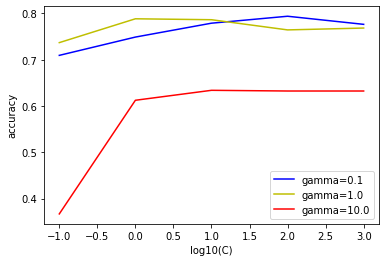

In [70]:
train_val_data = TrainValData(tfidf_data_path)  # 解析tfidf数据，并切割成训练集和校验集
search_tfidf = SVMSearch(train_val_data)         # 创建超参数搜索对象
search_tfidf.search()                    # 超参数C和gamma搜索
search_tfidf.draw()                     # 画出不同超参数组合下的accuracy曲线
search_tfidf.get_best_params()                # 找到最佳参数组合
search_tfidf.save_best_model("./model/Otto_rbfSVC.pkl")   # 保存模型

### 9.3 用tfidf+PCA后的数据来训练RBF核SVM

start trying: C=0.1, gamma=0.1
accuracy=0.707

start trying: C=0.1, gamma=1.0
accuracy=0.7385

start trying: C=0.1, gamma=10.0
accuracy=0.518

start trying: C=1.0, gamma=0.1
accuracy=0.7465

start trying: C=1.0, gamma=1.0
accuracy=0.7805

start trying: C=1.0, gamma=10.0
accuracy=0.723

start trying: C=10.0, gamma=0.1
accuracy=0.767

start trying: C=10.0, gamma=1.0
accuracy=0.7845

start trying: C=10.0, gamma=10.0
accuracy=0.728

start trying: C=100.0, gamma=0.1
accuracy=0.785

start trying: C=100.0, gamma=1.0
accuracy=0.766

start trying: C=100.0, gamma=10.0
accuracy=0.7285

start trying: C=1000.0, gamma=0.1
accuracy=0.773

start trying: C=1000.0, gamma=1.0
accuracy=0.757

start trying: C=1000.0, gamma=10.0
accuracy=0.728

best_C_=100.0, best_gamma_=0.1, best_accuracy_=0.785
start fitting with best params...
end fitting with best params.


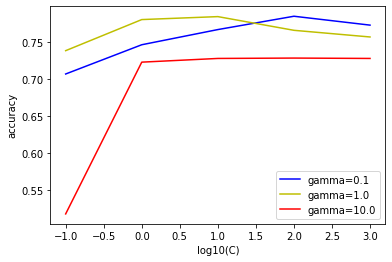

In [71]:
train_val_data_pca = TrainValData(tfidf_pca_data_path)  # 解析pca数据，并切割成训练集和校验集
search_pca = SVMSearch(train_val_data_pca)            # 创建超参数搜索对象
search_pca.search()                       # 超参数C和gamma搜索
search_pca.draw()                         # 画出不同超参数组合下的accuracy曲线
search_pca.get_best_params()                    # 找到最佳参数组合
search_pca.save_best_model("./model/Otto_pca_rbfSVC.pkl")       # 保存模型

### 9.4 对比分析

+ 对于gamma较小时，两者的效果差不多;
+ 对于gamma=10.0时，经过PCA降维后，accuracy明显要比仅仅tfidf处理的效果好。